# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [374]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [375]:
np.random.seed(0)
numpoints = 100
lesson_series_uniform = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

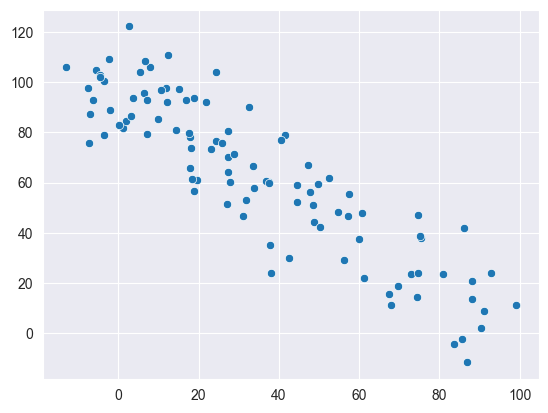

In [376]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [377]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, columns = ['uniform', 'skewed', 'reverse'])

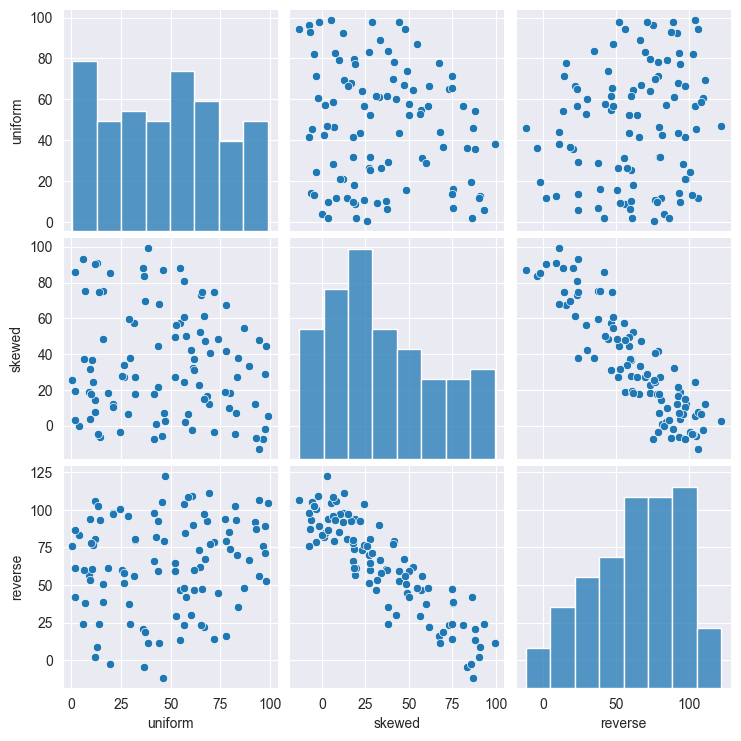

In [378]:
sns.pairplot(df)

We can compute the correlation coefficience between each pair.

In [379]:
print("Correlations:", df.corr())

Correlations:           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in predicting that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. Variables that are very correlated with each other might be redundant.  In the extreme case, two variables that have a correlation of 1.0 are "linearly dependent" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to detect problems with the data.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be interesting things to report.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

A waterfall chart shows a value after a sequence of inputs and outputs.

In [380]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name='This title is not displayed',
    orientation='v',
    measure=['absolute','relative','relative','relative','relative'],
    x=["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition='outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45,42.08,21.97,-54.31,-50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

/var/folders/bm/9gklnwns2kxcypy3sp68vlc80000gn/T/ipykernel_31306/3894176349.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='None'>

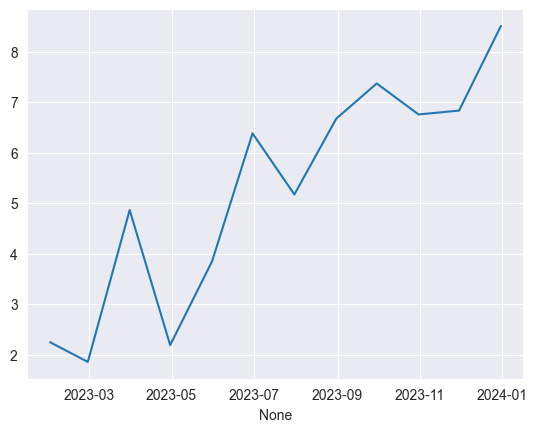

In [381]:
numdates = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
sns.lineplot(x = datearray, y = time_series)

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

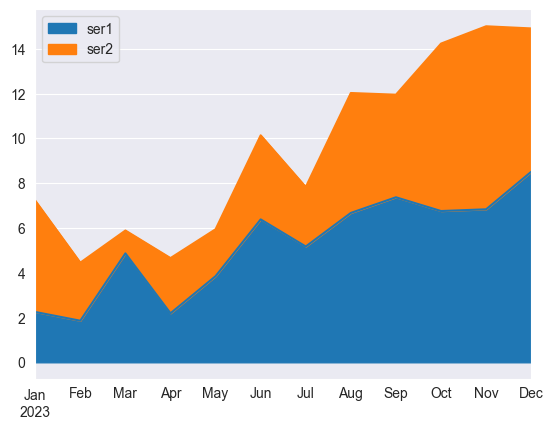

In [382]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  How would you alter the way these graphs are displayed to make them clearer or more informative?  Would you fit any of these graphs to a line or curve?  Why or why not?  What if you had to choose just _one_?  What if you had to choose _six_?

In [383]:

np.random.seed(0)
num_data = 100
base_data = np.random.random(size = num_data)
chem1 = base_data + np.random.normal(size = num_data) * 0.1
chem2 = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3 = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

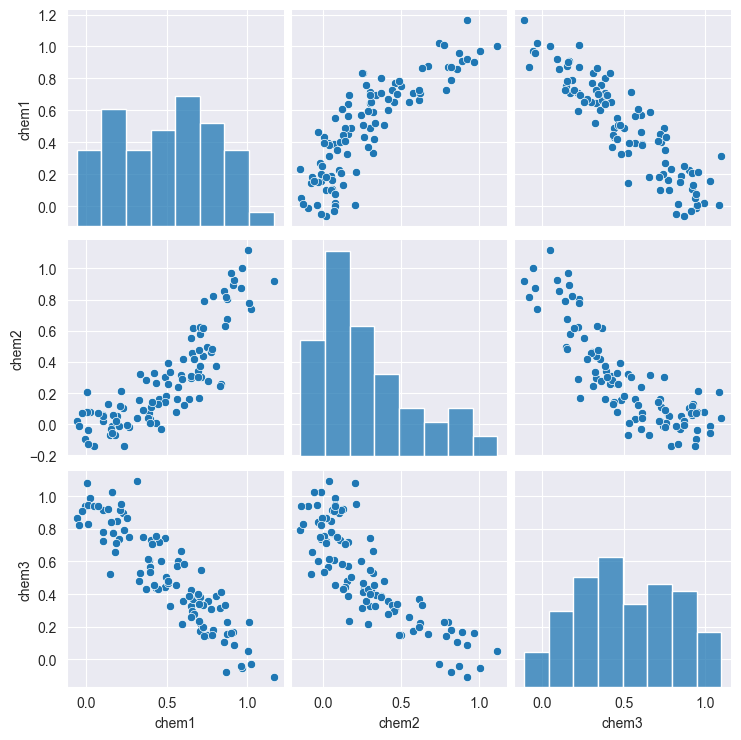

In [384]:
sns.pairplot(df_chem)

The Chem1 vs Chem2 is interesting due to positive correlation the chem1 vs chem 3 is also interesting (-ve Correlation). All the three histograms are also interesting as that gives the distribution of the chemicals. If I have to pick one I will go with Chemi1 vs Chem2 ie the 2nd graph from left in the first row as it shows the positive correlation and linearity is somewhat evident.

#### How to make the graph more interesting and information anb visually better :


Add a title to the graph

Add a legend to the graph

Add a grid to the graph

Add text on graph with correlation value

Instead of circular marker use square marker that will help for the color blind people and we could use colors which are better for color blind people



# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

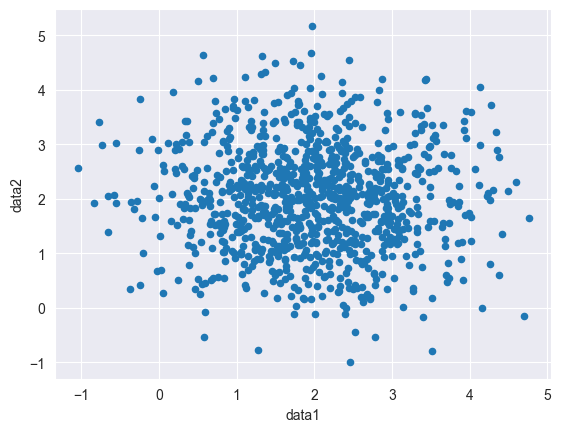

In [385]:
num_points = 1000
np.random.seed(0)
data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2
df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})
df_twonorm.plot.scatter(x = "data1", y = "data2")

Problem: Can you design data that will generate the following scatter plot?  You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

In [386]:
from IPython.display import Image
img = Image("twoclouds.png")


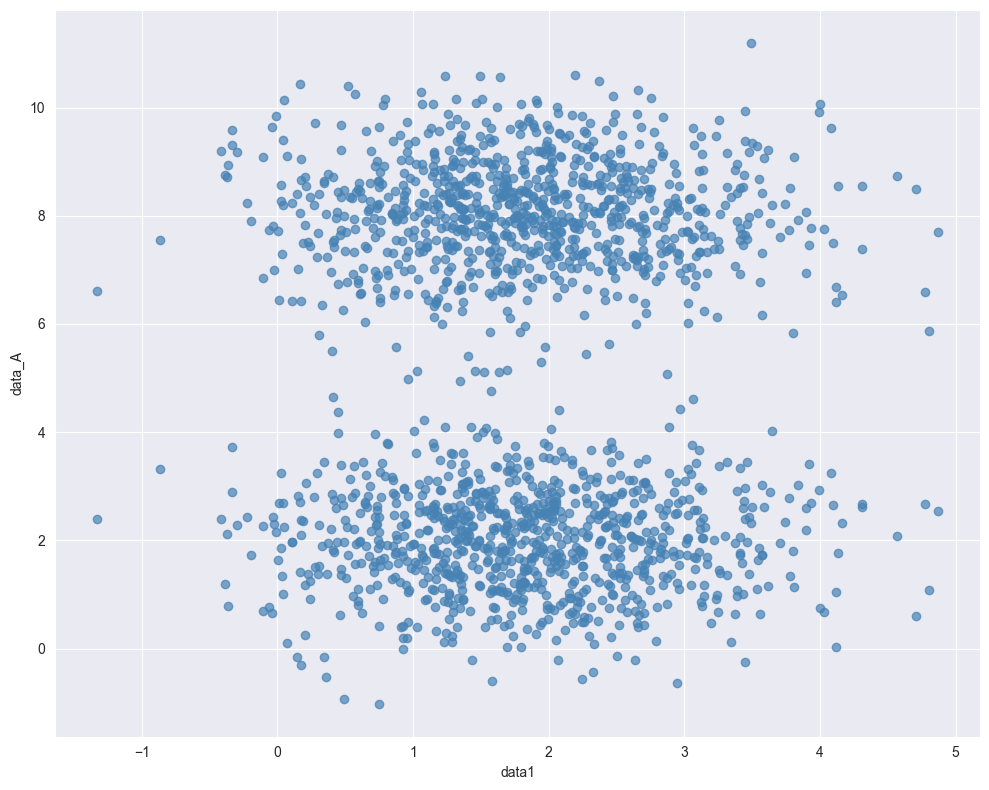

In [387]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Create three segments of x-values that will be used for both clouds
# This implements the "three segment join" approach
segment1_size = 300
segment2_size = 400
segment3_size = 200

# Create x-values across three segments (with some overlap)
x_segment1 = np.random.normal(1.1, 0.75, segment1_size)
x_segment2 = np.random.normal(2, 0.75, segment2_size)
x_segment3 = np.random.normal(2.5, 0.9, segment3_size)

# Create all x-values by joining the three segments
x_values = np.concatenate([x_segment1, x_segment2, x_segment3])

# Create the upper cloud (centered around y=8)
y_upper = np.random.normal(8, 1, len(x_values))

# Create the lower cloud (centered around y=2)
y_lower = np.random.normal(2, 1, len(x_values))

# Join the two series to create one big series for y-axis data
#  combines points from both the upper and lower clouds
final_x = np.concatenate([x_values, x_values])  # Use the same x-values for both clouds
final_y = np.concatenate([y_upper, y_lower])    # Combine the two y-value clouds

# Create a scatter plot and x tick at interval of 1 with x axis starting -1.5 and ending +5



plt.figure(figsize=(10, 8))
plt.scatter(final_x, final_y, alpha=0.7, color='steelblue')
plt.xlabel('data1')
plt.ylabel('data_A')
plt.xticks(np.arange(-1, 5.5, 1))
plt.tight_layout()

plt.show()

Challenge problem!  Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

In [388]:
from IPython.display import Image
Image("threeclouds.png")

FileNotFoundError: No such file or directory: 'threeclouds.png'

FileNotFoundError: No such file or directory: 'threeclouds.png'

<IPython.core.display.Image object>

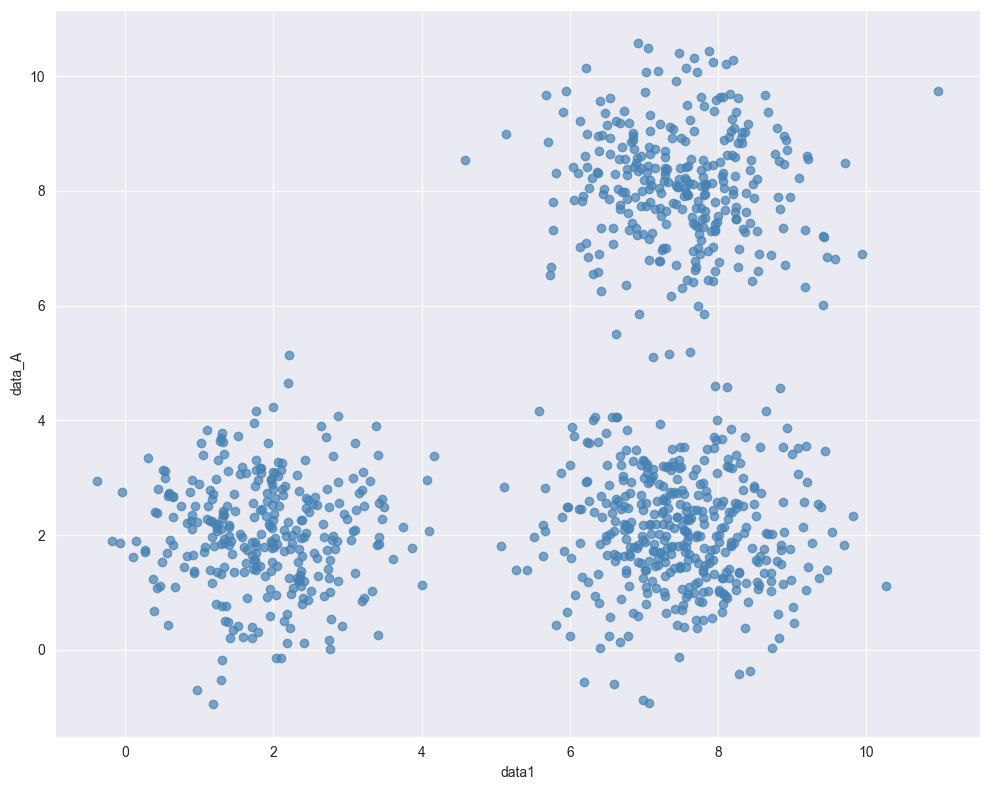

In [389]:

import matplotlib.pyplot as plt


# Set seed for reproducibility
np.random.seed(42)

# Create three segments of x-values that will be used for both clouds
# This implements the "three segment join" approach
segment1_size = 300
segment2_size = 400
segment3_size = 300

# Create x-values across three segments (with some overlap)
x_segment1 = np.random.normal(7.5, 0.9, segment1_size)
x_segment2 = np.random.normal(7.5, 0.9, segment2_size)
x_segment3 = np.random.normal(1.8, 0.9, segment3_size)

# Create Y values for three clouds
y_segment1 = np.random.normal(8, 1, len(x_segment1))
y_segment2 = np.random.normal(2, 1, len(x_segment2))
y_segment3 = np.random.normal(2, 1, len(x_segment3))

# Create all x-values by joining the three segments
x_values = np.concatenate([x_segment1, x_segment2,x_segment3])
# Create all y-values by joining the three segments
y_values = np.concatenate([y_segment1, y_segment2,y_segment3])

# Create a scatter plot and x tick at interval of 2 between 0 and 10.5

plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, alpha=0.7, color='steelblue')
plt.xlabel('data1')
plt.ylabel('data_A')
plt.xticks(np.arange(0, 10.5, 2))
plt.tight_layout()

plt.show()

Would you expect to see a correlation for this challenge problem?  (Hint: does knowing the value of data_A tell you anything about the value of data_B - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the corr() function.

In [390]:
#for the above challenge problem we can see that the correlation is

np.corrcoef(x_values, y_values)

array([[1.        , 0.38267734],
       [0.38267734, 1.        ]])

Here is a histogram.  Can you provide data that will approximately re-create this histogram?

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

In [395]:
from IPython.display import Image
Image("histogram.png")

FileNotFoundError: No such file or directory: 'histogram.png'

FileNotFoundError: No such file or directory: 'histogram.png'

<IPython.core.display.Image object>

Minimum bin frequency: 275.0
Maximum bin frequency: 1240.0
Correlation between drinks: -0.663


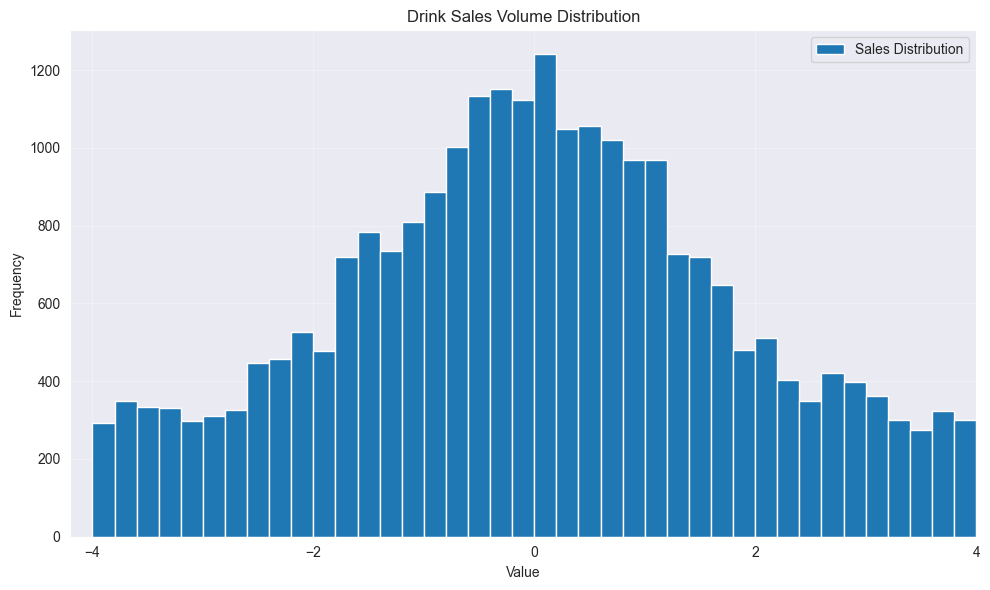

In [398]:

import matplotlib.pyplot as plt

# Creating a normally distributed sales volume with two drinks - one is +ve correlation, the other is -ve correlation
np.random.seed(42)

# Set tunable parameters
num_bins = 40
x_range = (-4.0, 4.0)
baseline_height = 300
target_max_height = 1200
bin_width = (x_range[1] - x_range[0]) / num_bins

# Create normal distribution over our bins
bin_centers = np.linspace(x_range[0] + bin_width/2, x_range[1] - bin_width/2, num_bins)
normal_heights = np.exp(-0.5 * (bin_centers / 1.2)**2)  # Normal distribution formula
normal_heights = normal_heights / np.max(normal_heights) * (target_max_height - baseline_height)

# Calculate samples we need for each bin, then ADD RANDOMNESS
samples_per_bin = normal_heights + baseline_height

# Add controlled randomness to each bin count (this is the key change)
noise_factor = 0.15  # Controls how much randomness to add (15% variation)
random_multipliers = np.random.uniform(1-noise_factor, 1+noise_factor, num_bins)
samples_per_bin = samples_per_bin * random_multipliers

# Ensure we don't go below the minimum baseline
samples_per_bin = np.maximum(samples_per_bin, baseline_height * 0.8)

total_samples_needed = int(np.sum(samples_per_bin))

# Generate samples for each bin
combined = []
for i, count in enumerate(samples_per_bin):
    # Calculate bin edges
    bin_min = x_range[0] + i * bin_width
    bin_max = bin_min + bin_width

    # Generate uniform samples within this bin
    bin_samples = np.random.uniform(bin_min, bin_max, int(count))
    combined.extend(bin_samples)

# Convert to numpy array
combined = np.array(combined)

# Transform this into two negatively correlated drink sales
drinkA_sales = []
drinkB_sales = []
for value in combined:
    drinkA = 10 + value + np.random.normal(0, 0.2)
    drinkB = 20 - value - np.random.normal(0, 2)
    drinkA_sales.append(max(0, drinkA))
    drinkB_sales.append(max(0, drinkB))

# Convert to numpy arrays and convert to integers for discrete sales units
drinkA_sales = np.array(drinkA_sales).astype(int)
drinkB_sales = np.array(drinkB_sales).astype(int)

# Create DataFrame with our series
df = pd.DataFrame({
    'drinkA_sales': drinkA_sales,
    'drinkB_sales': drinkB_sales,
    'combined_effect': combined
})

# Plot the histogram to verify our distribution
plt.figure(figsize=(10, 6))
counts, edges, _ = plt.hist(combined, bins=num_bins, color='#1f77b4', label='Sales Distribution')

# Set specific tick intervals
plt.xticks(np.arange(-4, 5, 2))
plt.yticks(np.arange(0, 1400, 200))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Drink Sales Volume Distribution')
plt.xlim(-4.2, 4)
plt.grid(alpha=0.3)
plt.legend()

# Print statistics
print(f"Minimum bin frequency: {min(counts):.1f}")
print(f"Maximum bin frequency: {max(counts):.1f}")
print(f"Correlation between drinks: {np.corrcoef(drinkA_sales, drinkB_sales)[0,1]:.3f}")

plt.tight_layout()
plt.show()

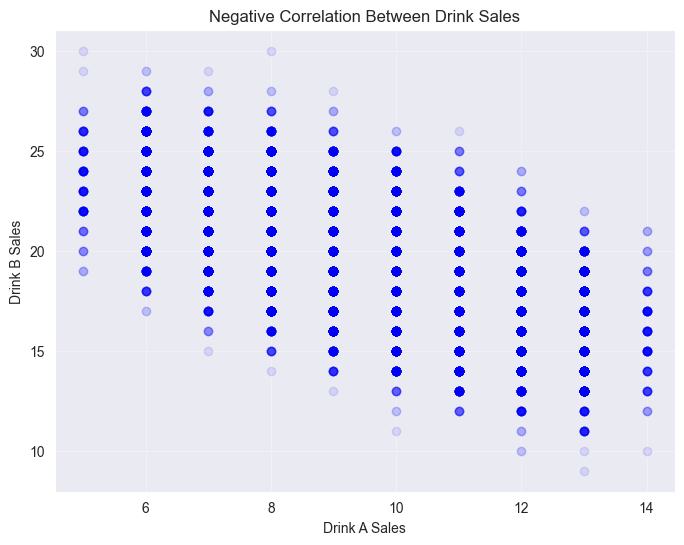

In [399]:
# To see the relationship between our drinks, we can plot a scatter
plt.figure(figsize=(8, 6))
plt.scatter(drinkA_sales, drinkB_sales, alpha=0.1, color='blue')
plt.xlabel('Drink A Sales')
plt.ylabel('Drink B Sales')
plt.title('Negative Correlation Between Drink Sales')
plt.grid(alpha=0.3)

Create a line plot that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.

#### The Plot below for Drink A shows U shape with decreasing and then increasing

Create an area plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.

#### The Plot for DrinkB belows the behaviour

(100,)
(100,)


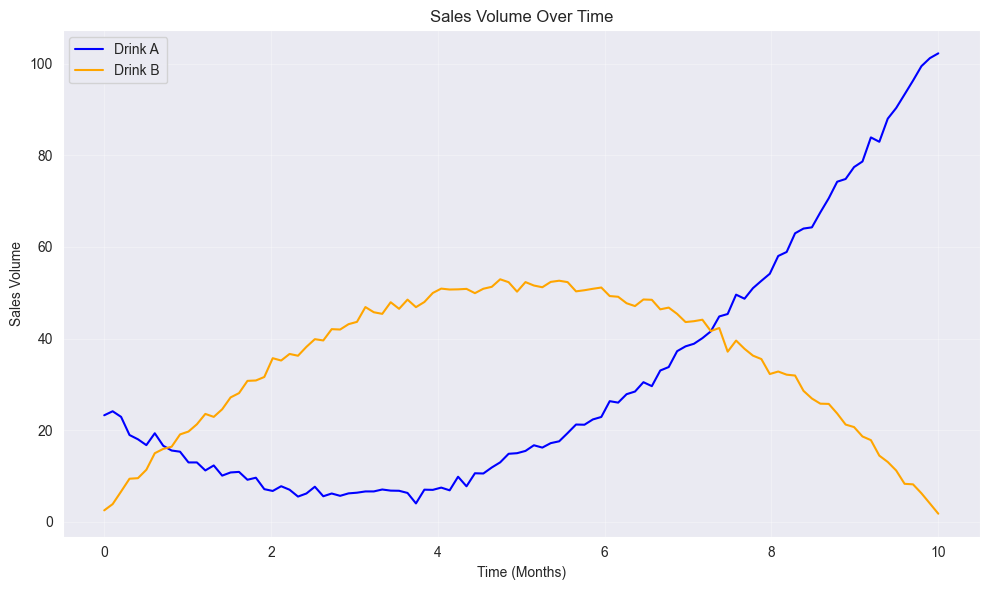

In [396]:
# we know parabola has u shaped and equation is  a (x-h)sq + K  where a,h, k  are +ve constants


# create a range of x values
x = np.linspace(0, 10, 100)

# calculate the corresponding y values for the parabola for drink A
y_A = 2 * (x - 3)**2 + 6
print(y_A.shape)


# calculate the corresponding y values for the parabola for drink B
y_B = -2 * (x - 5)**2 + 52
print(y_B.shape)

# add some noise to the y values for Drink A
np.random.seed(44)
noiseA = np.random.normal(0, 1, size=y_A.shape)
# Add noise to the y values of Drink B
np.random.seed(42)
noiseB  = np.random.normal(0, 1, size=y_B.shape)

y_noisy_drinkA = y_A + noiseA
y_noisy_drinkB = y_B + noiseB
# create a line plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy_drinkA, color='blue', label='Drink A ')
plt.plot(x, y_noisy_drinkB, color='orange', label='Drink B')
plt.xlabel('Time (Months)')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Over Time')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

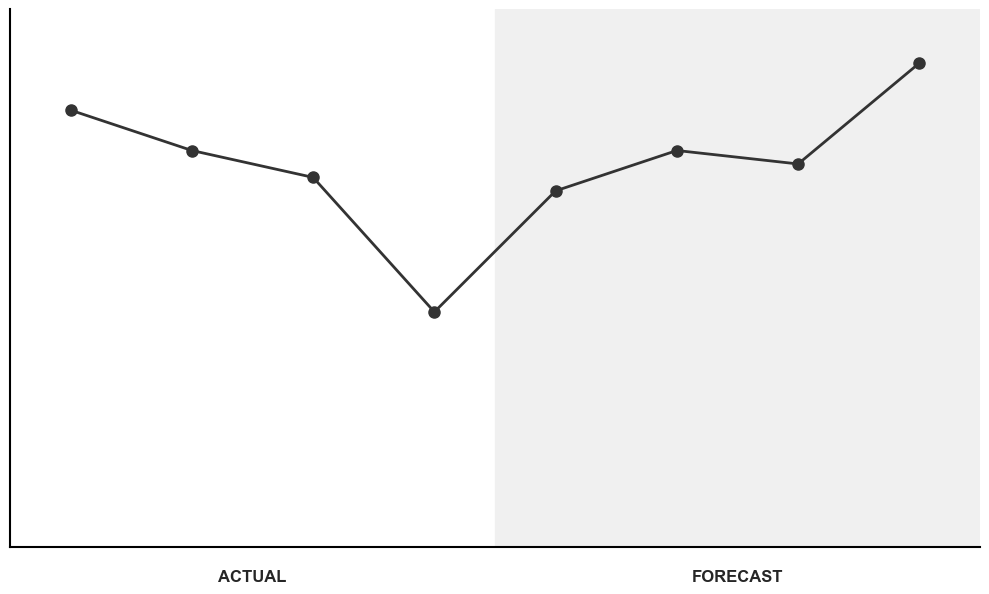

In [397]:
# Create dataset
actual_values = [65, 59, 55, 35]
actual_periods = list(range(1, len(actual_values) + 1))

# Forecast data
forecast_values = [53, 59, 57, 72]
forecast_periods = list(range(len(actual_values) + 1, len(actual_values) + len(forecast_values) + 1))

# Combine into a DataFrame for easier plotting
df = pd.DataFrame({
    'Period': actual_periods + forecast_periods,
    'Value': actual_values + forecast_values,
    'Type': ['Actual'] * len(actual_values) + ['Forecast'] * len(forecast_values)
})

# Create the plot with a light background
plt.figure(figsize=(10, 6))

# Set the background color to white
plt.gca().set_facecolor('white')  # White background for the axes
fig = plt.gcf()
fig.patch.set_facecolor('white')  # White background for the figure

# Add the shaded background for the forecast section
plt.axvspan(len(actual_values) + 0.5, max(forecast_periods) + 0.5, color='#f0f0f0', alpha=1)  # Light gray for FORECAST

# Draw the line across both sections
plt.plot(df['Period'], df['Value'], 'o-', color='#333333', linewidth=2, markersize=8)

# Configure the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)    # Hide top border
ax.spines['right'].set_visible(False)  # Hide right border
ax.spines['bottom'].set_visible(True)  # Show bottom axis
ax.spines['left'].set_visible(True)    # Show left axis

# Make axes lines thicker and darker for better visibility
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(1.5)
    ax.spines[spine].set_color('black')

# Add labels for ACTUAL and FORECAST sections below the X axis
plt.text(np.mean(actual_periods), -5, 'ACTUAL', fontsize=12, ha='center', fontweight='bold')
plt.text(np.mean(forecast_periods), -5, 'FORECAST', fontsize=12, ha='center', fontweight='bold')

# set axis limits
plt.xlim(min(actual_periods) - 0.5, max(forecast_periods) + 0.5)
plt.ylim(0, 80)

#remove tick marks
plt.xticks([])
plt.yticks([])

# Adjust layout
plt.tight_layout()

plt.show()